<a href="https://colab.research.google.com/github/jadersonrocha/data-science-challenge-alura-store/blob/main/Desafio_telecom_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Verifique valores nulos e tipos de dados:
df.info()
df.isnull().sum()


- Converta colunas como TotalCharges para numérico:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


- Mapeie variáveis categóricas para facilitar a leitura:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Sim', 0: 'Não'})



3. 📊 Análise Exploratória de Dados (EDA)
Use matplotlib e seaborn para visualizar padrões:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição de churn
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.show()

# Relação entre tipo de contrato e churn
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por Tipo de Contrato')
plt.show()



4. 📈 Principais Insights
Com base em projetos semelhantes, aqui estão padrões comuns:
- Clientes com contrato mensal têm maior taxa de churn.
- Baixo tempo de permanência (tenure) está associado à evasão.
- Serviços adicionais como suporte técnico e segurança reduzem o churn.
- Pagamento via cartão eletrônico está correlacionado com maior evasão.

5. 🧠 Próximos Passos
Após a EDA, a equipe pode:
- Criar modelos preditivos (ex: regressão logística, árvores de decisão).
- Desenvolver estratégias de retenção com base nos insights.

Se quiser ver um projeto completo em vídeo, recomendo este vídeo tutorial sobre EDA com Python e churn de telecom— ele mostra desde a importação dos dados até os insights finais.
Quer que eu te ajude a montar um relatório com gráficos e conclusões?


In [170]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data_json = response.json()

# Normalizar estrutura JSON para DataFrame
df = pd.json_normalize(data_json)

In [171]:
# Verificando os valores nulos e tipos de dados

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [172]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [173]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [175]:
# Verifica a quantidade de valores ausentes por coluna
df.isnull().sum()

# Visualiza a porcentagem de valores ausentes
(df.isnull().sum() / len(df)) * 100


,0
customerID,0.000000
Churn,0.000000
customer.gender,0.000000
customer.SeniorCitizen,0.000000
customer.Partner,0.000000
customer.Dependents,0.000000
customer.tenure,0.000000
phone.PhoneService,0.000000
phone.MultipleLines,0.000000
internet.InternetService,0.000000


In [176]:
# Verifica linhas duplicadas
df.duplicated()

# Exibe apenas as duplicadas
df[df.duplicated()]

# Remove duplicatas
df.drop_duplicates(inplace=True)


In [177]:
# Verifica tipos de dados
df.dtypes

# Converte colunas para tipo correto
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')


In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def verificar_qualidade_dados(df):
    print("Verificação de Qualidade dos Dados\n")

    # 1. Valores Ausentes
    print("Valores Ausentes:")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({'Total': missing, 'Percentual (%)': missing_percent})
    print(missing_df[missing_df['Total'] > 0])
    print("\n")

    # 2. Duplicatas
    print("Linhas Duplicadas:")
    total_duplicadas = df.duplicated().sum()
    print(f"Total de linhas duplicadas: {total_duplicadas}")
    print("\n")

    # 3. Tipos de Dados
    print("Tipos de Dados:")
    print(df.dtypes)
    print("\n")

    # 4. Valores Únicos em Colunas Categóricas
    print("Valores Únicos em Colunas Categóricas:")
    colunas_cat = df.select_dtypes(include='object').columns
    for col in colunas_cat:
        print(f"\nColuna: {col}")
        print(df[col].value_counts(dropna=False))
    print("\n")

    # 5. Estatísticas Descritivas
    print("Estatísticas Descritivas:")
    print(df.describe())
    print("\n")

    # 6. Boxplot para Outliers (opcional)
    print("Visualização de Outliers:")
    colunas_num = df.select_dtypes(include=['int64', 'float64']).columns
    for col in colunas_num:
        plt.figure(figsize=(6, 2))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot - {col}')
        plt.show()

Verificação de Qualidade dos Dados

Valores Ausentes:
                       Total  Percentual (%)
account.Charges.Total     11        0.151369


Linhas Duplicadas:
Total de linhas duplicadas: 0


Tipos de Dados:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: obj

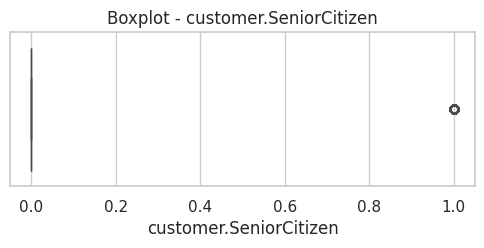

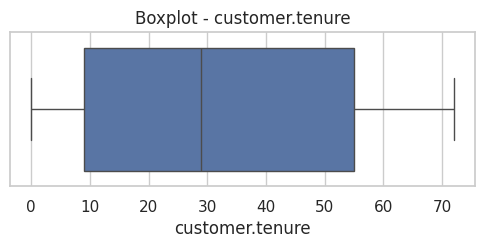

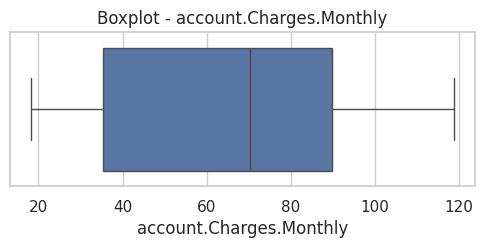

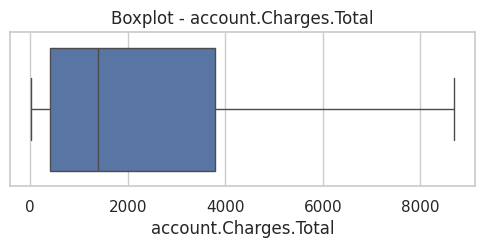

In [179]:
verificar_qualidade_dados(df)


In [180]:
# Criação da coluna com base no faturamento mensal
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [181]:
# Criação da coluna com base no faturamento mensal
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30


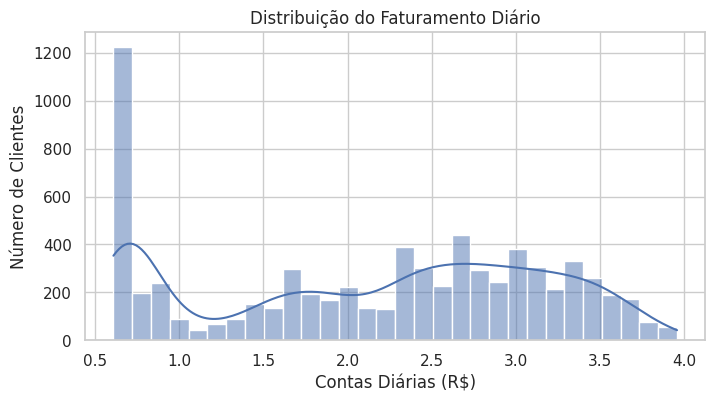

In [182]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Contas_Diarias'], bins=30, kde=True)
plt.title('Distribuição do Faturamento Diário')
plt.xlabel('Contas Diárias (R$)')
plt.ylabel('Número de Clientes')
plt.show()


In [183]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [184]:
# Seleciona colunas do tipo objeto (texto)
colunas_obj = df.select_dtypes(include='object').columns

# Filtra colunas que possuem apenas "Yes"/"No" como valores únicos
colunas_binarias = [col for col in colunas_obj if set(df[col].dropna().unique()) <= {'Yes', 'No'}]


In [185]:
# Mapeia "Yes" para 1 e "No" para 0
for col in colunas_binarias:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [186]:
#verificando as colunas que foram convertidas.
df[colunas_binarias].head()

,customer.Partner,customer.Dependents,phone.PhoneService,account.PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


In [187]:
# Análise Descritiva
# Estatísticas gerais para colunas numéricas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
customer.SeniorCitizen,7267.0,0.162653,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000
customer.Partner,7267.0,0.484106,0.499782,0.000000,0.000000,0.000000,1.000000,1.000000
customer.Dependents,7267.0,0.300124,0.458343,0.000000,0.000000,0.000000,1.000000,1.000000
customer.tenure,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
phone.PhoneService,7267.0,0.902711,0.296371,0.000000,1.000000,1.000000,1.000000,1.000000
account.PaperlessBilling,7267.0,0.593230,0.491265,0.000000,0.000000,1.000000,1.000000,1.000000
account.Charges.Monthly,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
account.Charges.Total,7256.0,2280.634213,2268.632997,18.800000,400.225000,1391.000000,3785.300000,8684.800000
Contas_Diarias,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333


* Análise descritivas adicionais.

Média
Mediana
Desvio Padrão
Mínimo
Máximo
Assimetria
Curtose


In [188]:
# Função personalizada para análise descritiva
def resumo_estatistico(df):
    resumo = pd.DataFrame()
    colunas_num = df.select_dtypes(include=['int64', 'float64']).columns

    for col in colunas_num:
        resumo[col] = [
            df[col].mean(),
            df[col].median(),
            df[col].std(),
            df[col].min(),
            df[col].max(),
            df[col].skew(),

        ]

    resumo.index = ['Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo', 'Assimetria']
    return resumo.T


resumo_estatistico(df)


,Média,Mediana,Desvio Padrão,Mínimo,Máximo,Assimetria
customer.SeniorCitizen,0.162653,0.000000,0.369074,0.000000,1.000000,1.828574
customer.Partner,0.484106,0.000000,0.499782,0.000000,1.000000,0.063620
customer.Dependents,0.300124,0.000000,0.458343,0.000000,1.000000,0.872408
customer.tenure,32.346498,29.000000,24.571773,0.000000,72.000000,0.239523
phone.PhoneService,0.902711,1.000000,0.296371,0.000000,1.000000,-2.718357
account.PaperlessBilling,0.593230,1.000000,0.491265,0.000000,1.000000,-0.379654
account.Charges.Monthly,64.720098,70.300000,30.129572,18.250000,118.750000,-0.216539
account.Charges.Total,2280.634213,1391.000000,2268.632997,18.800000,8684.800000,0.964218
Contas_Diarias,2.157337,2.343333,1.004319,0.608333,3.958333,-0.216539


Algumas analises sobre os indicadores referentes a:
- Clientes com menor tempo de permanência (tenure) tendem a ter menor faturamento?
- Existe concentração de clientes em faixas específicas de cobrança mensal?
- A distribuição de TotalCharges é assimétrica (indicando outliers ou perfis extremos)?



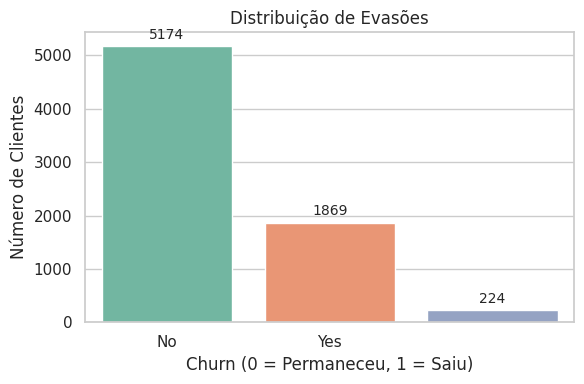

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Cria o gráfico e salva o eixo na variável 'ax'
ax = sns.countplot(x='Churn', data=df, palette='Set2')
ax.set_title('Distribuição de Evasões')
ax.set_xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
ax.set_ylabel('Número de Clientes')

# Adiciona os valores acima das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()


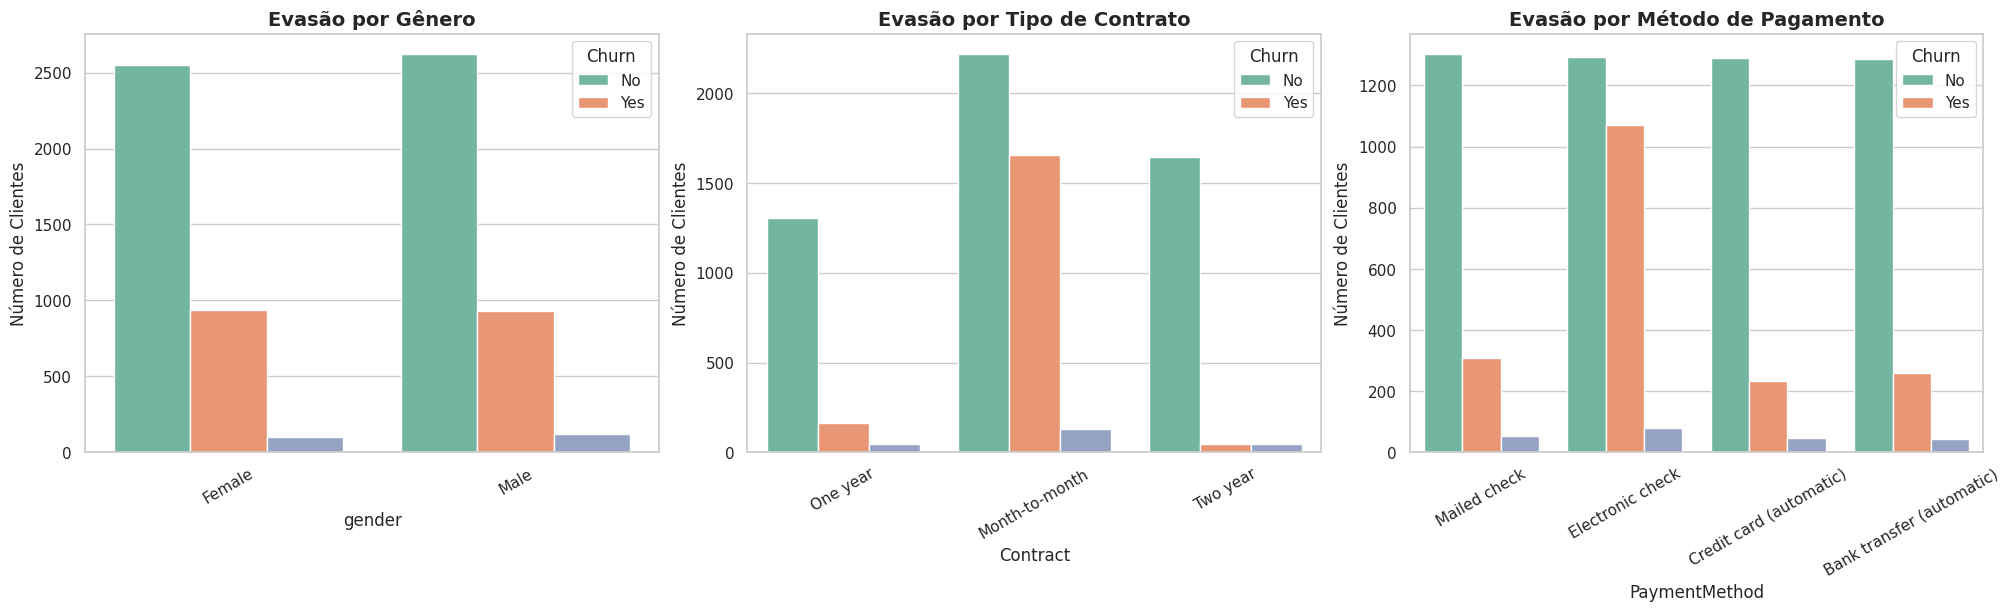

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista das variáveis categóricas e títulos
variaveis = ['customer.gender', 'account.Contract', 'account.PaymentMethod']
titulos = ['Evasão por Gênero', 'Evasão por Tipo de Contrato', 'Evasão por Método de Pagamento']

# Estilo visual padronizado
sns.set_theme(style='whitegrid')

# Tamanho da figura e espaçamento entre gráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 6), constrained_layout=True)

# Loop para gerar os gráficos
for i, var in enumerate(variaveis):
    sns.countplot(x=var, hue='Churn', data=df, palette='Set2', ax=axes[i])
    axes[i].set_title(titulos[i], fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var.split('.')[-1], fontsize=12)
    axes[i].set_ylabel('Número de Clientes', fontsize=12)
    #axes[i].legend(title='Evasão', labels=['Permaneceu', 'Saiu'], loc='upper right')
    axes[i].tick_params(axis='x', rotation=30)

plt.show()

In [191]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [192]:
# Remove espaços e valores nulos
df['Churn'] = df['Churn'].astype(str).str.strip()

# Filtra apenas valores válidos
df = df[df['Churn'].isin(['Yes', 'No'])]

# Converte para binário
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [193]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [194]:
# Remove espaços e converte para numérico
df['account.Charges.Total'] = df['account.Charges.Total'].astype(str).str.strip()
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

df_filtrado['Churn'] = df_filtrado['Churn'].map({'Yes': 1, 'No': 0})



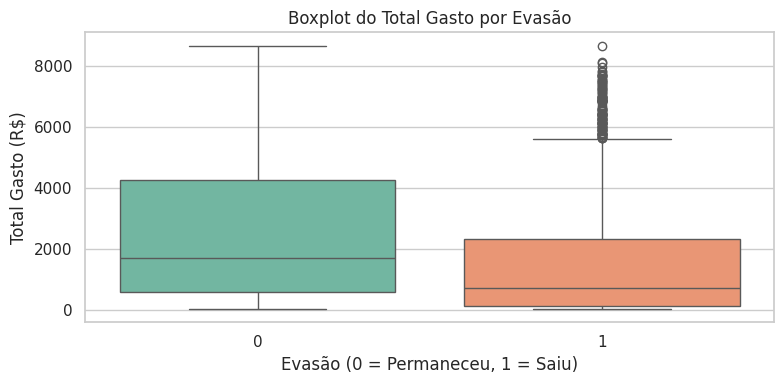

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra apenas linhas com valores válidos
df_filtrado = df[df['account.Charges.Total'].notnull()]

plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_filtrado, palette={'0': '#66c2a5', '1': '#fc8d62'}) # Chaves alteradas para strings
plt.title('Boxplot do Total Gasto por Evasão')
plt.xlabel('Evasão (0 = Permaneceu, 1 = Saiu)')
plt.ylabel('Total Gasto (R$)')
plt.tight_layout()
plt.show()

In [198]:
print(df_filtrado.shape)
print(df_filtrado[['Churn', 'account.Charges.Total']].head())



(7032, 22)
   Churn  account.Charges.Total
0      0                 593.30
1      0                 542.40
2      1                 280.85
3      1                1237.85
4      1                 267.40


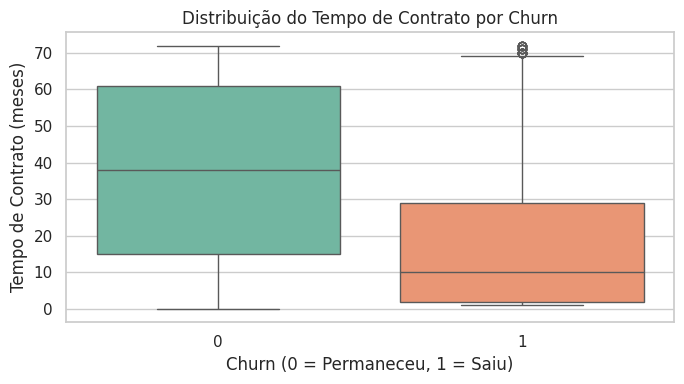

In [199]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='Churn', y='customer.tenure', data=df, palette='Set2')
plt.title('Distribuição do Tempo de Contrato por Churn')
plt.xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
plt.ylabel('Tempo de Contrato (meses)')
plt.tight_layout()
plt.show()
